In [32]:
'''
Importar librerías
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from kneed import KneeLocator 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
'''
Importando datos
'''
demandaa = pd.read_excel('Demanda tipo de servicio a.xlsm')
demandac = pd.read_excel('Demanda tipo de servicio c.xlsm')
servicio_tipodemanda = pd.read_excel('servicio por tipo y demanda.xlsm')
servicio_tipo_tatencion = pd.read_excel('servicios por tipo y tiempo de atencion.xlsm')
servicio_tipo_tespera = pd.read_excel('servicios por tipo y tiempo de espera.xlsm')

In [6]:
demandaa = demandaa.rename(columns = lambda x: x.lower()) # 522 oficinas
demandac = demandac.rename(columns = lambda x: x.lower()) # 522 oficinas
servicio_tipodemanda = servicio_tipodemanda.rename(columns = lambda x: x.lower()) ## 526 oficinas | 522 oficinas A y 522 oficinas C
servicio_tipo_tatencion = servicio_tipo_tatencion.rename(columns = lambda x: x.lower()) ## 526 oficinas
servicio_tipo_tespera = servicio_tipo_tespera.rename(columns = lambda x: x.lower()) ## 526 oficinas

### 1. Separando por servicio

In [21]:
# Dividiendo por tipo de servicio
servicioa_demanda = servicio_tipodemanda[servicio_tipodemanda['servicetype'] == 'A']
servicioc_demanda = servicio_tipodemanda[servicio_tipodemanda['servicetype'] == 'C']

servicio_demanda_a = servicioa_demanda.groupby(['unitnam', 'mes'], as_index = False)['recuento de caseid'].sum()
servicio_demanda_c = servicioc_demanda.groupby(['unitnam', 'mes'], as_index = False)['recuento de caseid'].sum()

In [26]:
# Dividiendo por tipo de servicio
servicioa_tatencion = servicio_tipo_tatencion[servicio_tipo_tatencion['servicetype'] == 'A']
servicioc_tatencion = servicio_tipo_tatencion[servicio_tipo_tatencion['servicetype'] == 'C']

servicio_tatencion_a = servicioa_tatencion.groupby(['unitnam', 'mes'], as_index = False)['promedio de servicetimeminutes_service'].mean()
servicio_tatencion_c = servicioa_tatencion.groupby(['unitnam', 'mes'], as_index = False)['promedio de servicetimeminutes_service'].mean()

In [30]:
# Dividiendo por tipo de servicio
servicioa_tespera = servicio_tipo_tespera [servicio_tipo_tespera ['servicetype'] == 'A']
servicioc_tespera = servicio_tipo_tespera [servicio_tipo_tespera ['servicetype'] == 'C']

servicio_tespera_a = servicioa_tespera.groupby(['unitnam', 'mes'], as_index = False)['promedio de waittimeminutes'].mean()
servicio_tespera_c = servicioa_tespera.groupby(['unitnam', 'mes'], as_index = False)['promedio de waittimeminutes'].mean()

In [31]:
servicio_tespera_a

,unitnam,mes,promedio de waittimeminutes
0,(001) C,diciembre,14.757917
1,(001) C,enero,18.077204
2,(001) C,noviembre,18.534588
3,(002) C,diciembre,16.613764
4,(002) C,enero,16.728655
...,...,...,...
1559,(993) U,enero,20.544101
1560,(993) U,noviembre,9.096031
1561,(996) F,diciembre,4.858761
1562,(996) F,enero,6.029377


In [40]:
dfs = [servicio_demanda_a, servicio_tatencion_a, servicio_tespera_a, demandaa]

servicios_a = reduce(lambda left, right:  pd.merge(left, right, on = ['unitnam', 'mes']), dfs)

In [41]:
servicios_a

,unitnam,mes,recuento de caseid,promedio de servicetimeminutes_service,promedio de waittimeminutes,recuento de countcaseid
0,(001) C,diciembre,2529,16.671327,14.757917,339
1,(001) C,enero,2586,19.453427,18.077204,350
2,(001) C,noviembre,2442,22.121303,18.534588,326
3,(002) C,diciembre,2636,21.443143,16.613764,299
4,(002) C,enero,3252,16.667223,16.728655,353
...,...,...,...,...,...,...
1558,(993) U,enero,882,19.078139,20.544101,245
1559,(993) U,noviembre,676,12.702259,9.096031,208
1560,(996) F,diciembre,1007,22.557539,4.858761,263
1561,(996) F,enero,966,20.372441,6.029377,267


## 2. Modelo de clústering K-MEANS

C:\Users\USUARIO\anaconda3\envs\ml_umaker\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USUARIO\anaconda3\envs\ml_umaker\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USUARIO\anaconda3\envs\ml_umaker\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\USUARIO\anaconda3\envs\ml_umaker\Lib\site-packages\sklearn\cluster\_kmeans.p

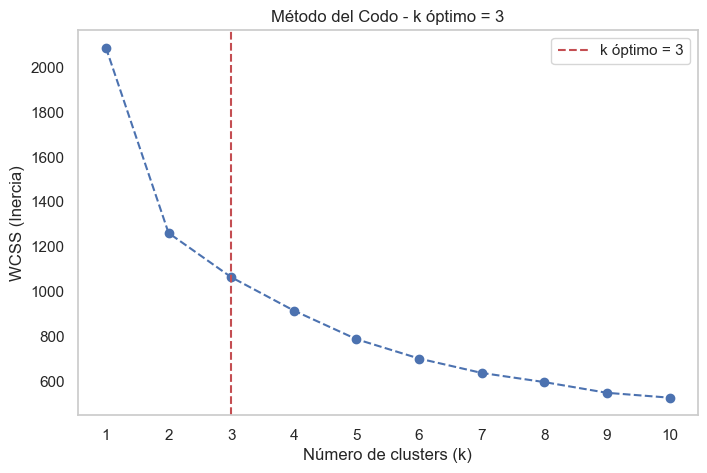

Número óptimo de clusters (k): 3


In [80]:
# Datos escalados (X_escalado del preprocesamiento)
wcss = []
k_range = range(1, 11)  # Rango de k a evaluar

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_escalado)
    wcss.append(kmeans.inertia_)

# Encontrando el codo
kneedle = KneeLocator(
    k_range, 
    wcss, 
    curve="convex",  
    direction="decreasing"  
)
k_optimo = kneedle.elbow

# Gráfica
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o', linestyle='--')
plt.xlabel('Número de clusters (k)')
plt.ylabel('WCSS (Inercia)')
plt.title(f'Método del Codo - k óptimo = {k_optimo}')
plt.axvline(x=k_optimo, color='r', linestyle='--', label=f'k óptimo = {k_optimo}')
plt.xticks(k_range)
plt.grid()
plt.legend()


    'codos.png',         
    dpi=300,             
    bbox_inches='tight', 
    facecolor='white'    
)


plt.show()

print(f"Número óptimo de clusters (k): {k_optimo}")


In [57]:
'''
Funciones para graficar los clústeres
'''

def plot_data(X, y):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'k.', markersize=2)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=50, linewidths=50,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, y, resolution=1000, show_centroids=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X, y)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

### Resultados

C:\Users\USUARIO\anaconda3\envs\ml_umaker\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


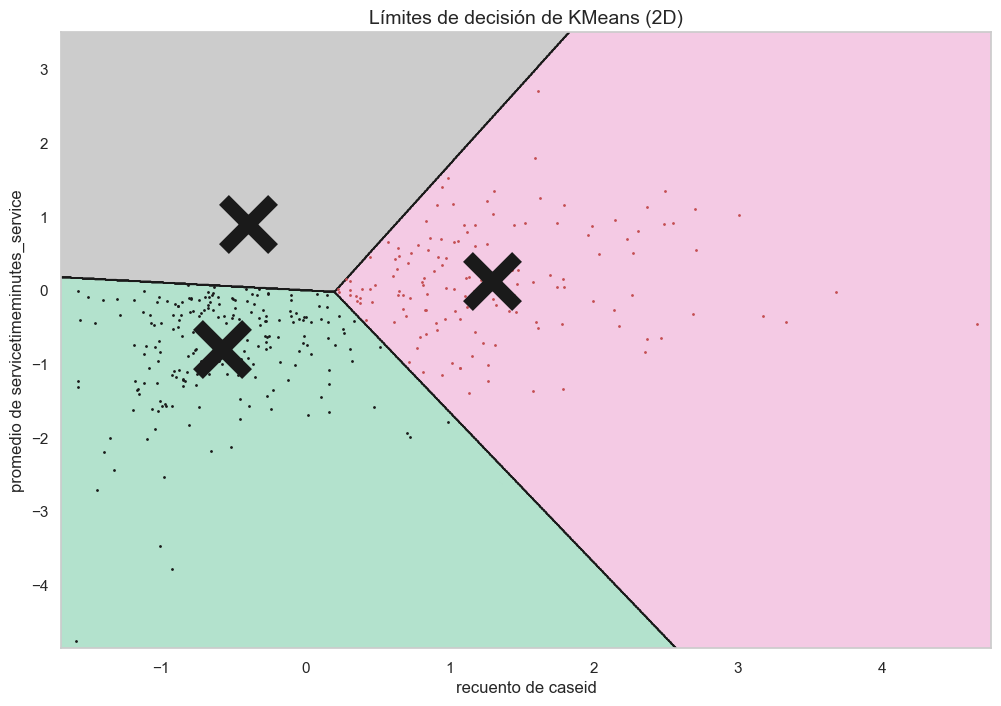

In [85]:
nombres_variables = columnas_numericas[:2]


X_2d = X_escalado[:, :2]


kmeans_2d = KMeans(n_clusters=3, random_state=42)
kmeans_2d.fit(X_2d)


plt.figure(figsize=(12, 8))
plot_decision_boundaries(kmeans_2d, X_2d, kmeans_2d.labels_)


plt.xlabel(nombres_variables[0], fontsize=12)
plt.ylabel(nombres_variables[1], fontsize=12)
plt.title('Límites de decisión de KMeans (2D)', fontsize=14)


plt.savefig(
    'cclusteres.png',
    dpi=300,
    bbox_inches='tight',
    facecolor='white'
)

plt.show()



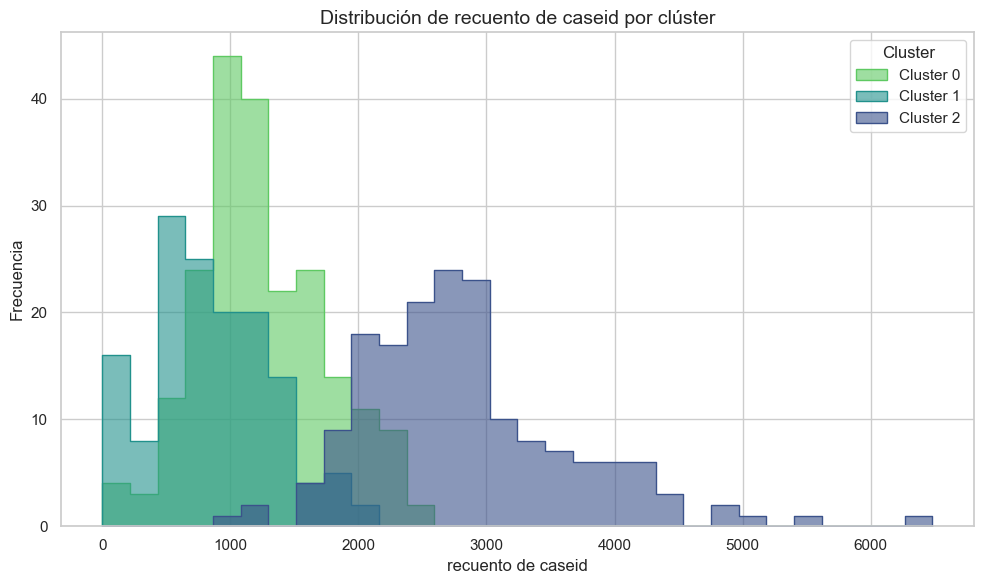

In [83]:
sns.set(style="whitegrid")


variable = 'recuento de caseid'

plt.figure(figsize=(10, 6))
ax = sns.histplot(
    data=df_agregado,
    x=variable,
    hue='cluster',
    palette='viridis',
    element='step',
    alpha=0.6,
    bins=30
)


unique_clusters = sorted(df_agregado['cluster'].unique())
ax.legend(
    title='Cluster',
    labels=[f'Cluster {c}' for c in unique_clusters],
    frameon=True,
    facecolor='white'
)

plt.title(f'Distribución de {variable} por clúster', fontsize=14)
plt.xlabel(variable)
plt.ylabel('Frecuencia')
plt.tight_layout()

plt.savefig(
    'histograma1.png',         
    dpi=300,             
    bbox_inches='tight', 
    facecolor='white'    
)

plt.show()


In [71]:
df_agregado

,unitnam,recuento de caseid,promedio de servicetimeminutes_service,promedio de waittimeminutes,recuento de countcaseid,cluster
0,(001) C,2519.000000,19.415353,17.123237,338.333333,0
1,(002) C,2916.000000,21.148990,16.860044,324.333333,0
2,(004) L,1895.000000,20.419270,14.399863,264.666667,2
3,(005) A,1235.333333,25.608706,11.294973,235.000000,2
4,(006) A,1860.000000,27.102240,21.335366,311.333333,2
...,...,...,...,...,...,...
517,(967) B,90.000000,20.129647,12.234889,66.000000,1
518,(972) C,1932.333333,18.072657,9.042128,354.666667,2
519,(991) V,771.000000,15.370869,7.572701,245.000000,1
520,(993) U,771.000000,14.980300,14.657404,229.333333,1
